In [1]:
# Attempt to plot Khumbu dataset
%matplotlib notebook

In [2]:
# Import modules - make sure you activated your rasterenv environment!
from osgeo import gdal
import os
import numpy as np
import matplotlib.pyplot as plt
import rasterio

from pygeotools.lib import iolib, warplib, geolib, timelib, malib

In [3]:
# generate 3 panel plot for input arrays
#Function to generate a 3-panel plot for input arrays
def plot3panel(dem_list, clim=None, titles=None, cmap='inferno', label=None, overlay=None, fn=None):
    fig, axa = plt.subplots(1,3, sharex=True, sharey=True, figsize=(10,5))
    alpha = 1.0
    for n, ax in enumerate(axa):
        #Gray background
        ax.set_facecolor('0.5')
        #Force aspect ratio to match images
        ax.set(adjustable='box-forced', aspect='equal')
        #Turn off axes labels/ticks
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if titles is not None:
            ax.set_title(titles[n])
        #Plot background shaded relief map
        if overlay is not None:
            alpha = 0.7
            axa[n].imshow(overlay[n], cmap='gray', clim=(1,255)) 
    #Plot each array 
    im_list = [axa[i].imshow(dem_list[i], clim=clim, cmap=cmap, alpha=alpha) for i in range(len(dem_list))]
    fig.tight_layout()
    fig.colorbar(im_list[0], ax=axa.ravel().tolist(), label=label, extend='both', shrink=0.5)
    if fn is not None:
        fig.savefig(fn, bbox_inches='tight', pad_inches=0, dpi=150)

#### DEM sources:
32 m DEM derived from WorldView Stereo imagery acquired from 2003 to 2016

In [20]:
# Directory of trans data
data_dir = 'dem_32_transOnly/'
filenames = os.listdir(data_dir)

# Generate list of filenames for 32m trans files
dem_fn_list = []
for file in filenames:
    #print(file)
    fn = data_dir + file
    dem_fn_list.append(fn)
# Arrange list in order of oldest to newest image
dem_fn_list.sort()

# Directory of hillshade data
data_dir = 'dem_32_hs_az/'
filenames = os.listdir(data_dir)

# Generate list of filenames for hs files
dem_fn_list_hs = []
for file in filenames:
#     print(file)
    fn = data_dir + file
    dem_fn_list_hs.append(fn)
    
# Arrange list in order of oldest to newest image
dem_fn_list_hs.sort()


In [5]:
# # Input DEM filenames - manual from tutorial, no longer needed
# dem_2003_fn = 'dem_32_transOnly/20030507_0445_1010010001E01600_1010010001E01500-DEM_32m_trans.tif'
# dem_2012_fn = 'dem_32_transOnly/20121223_0456_1050410000E0AE00_1050410000E8C900-DEM_32m_trans.tif'
# dem_2014_fn = 'dem_32_transOnly/20141022_0518_1020010036518E00_102001003525D400-DEM_32m_trans.tif'
# dem_2016_fn = 'dem_32_transOnly/20161025_0524_104001002469AD00_1040010024438E00-DEM_32m_trans.tif'

# dem_fn_list = [dem_2003_fn, dem_2014_fn, dem_2016_fn]

In [6]:
# ds_list = warplib.memwarp_multi_fn(dem_fn_list, extent='intersection', res='min', t_srs=dem_2016_fn)

ds_list = warplib.memwarp_multi_fn(dem_fn_list, extent='union', res='min', t_srs=dem_fn_list[-1])
ds_hs_list = warplib.memwarp_multi_fn(dem_fn_list_hs, extent='union', res='min', t_srs=dem_fn_list[-1])


Warping all inputs to the following:
Resolution: 32.0
Extent: [473230.772, 3085731.302, 497009.303, 3103537.631]
Projection: '+proj=utm +zone=45 +datum=WGS84 +units=m +no_defs '
Resampling alg: cubic

1 of 29: dem_32_transOnly/20030507_0445_1010010001E01600_1010010001E01500-DEM_32m_trans.tif
nl: 556 ns: 743 res: 32.000
2 of 29: dem_32_transOnly/20121223_0456_1050410000E0AE00_1050410000E8C900-DEM_32m_trans.tif
nl: 556 ns: 743 res: 32.000
3 of 29: dem_32_transOnly/20121228_0506_102001001FB33300_102001002097D600-DEM_32m_trans.tif
nl: 556 ns: 743 res: 32.000
4 of 29: dem_32_transOnly/20130106_0456_102001001D141500_102001001DC53200-DEM_32m_trans.tif
nl: 556 ns: 743 res: 32.000
5 of 29: dem_32_transOnly/20131229_0456_10200100296A0900_10200100298D5F00-DEM_32m_trans.tif
nl: 556 ns: 743 res: 32.000
6 of 29: dem_32_transOnly/20140303_0447_1020010029AC1C00_102001002BD01800-DEM_32m_trans.tif
nl: 556 ns: 743 res: 32.000
7 of 29: dem_32_transOnly/20140307_0452_102001002C5CED00_102001002CCB4600-DEM_

In [7]:
# Load datasets to NumPy masked arrays
# dem_2003, dem_2014, dem_2016 = [iolib.ds_getma(i) for i in ds_list]
# dem_list = [dem_2003, dem_2014, dem_2016]

In [8]:
# Load datasets to NumPy masked arrays
dem_list = []

for i in ds_list:
    thisDEM = iolib.ds_getma(i)
    dem_list.append(thisDEM)
    
dem_hs_list = []
for i in ds_hs_list:
    thisDEM = iolib.ds_getma(i)
    dem_hs_list.append(thisDEM)

In [24]:
testDEM = dem_list[22]
print(testDEM.shape)
print(testDEM.dtype)

testDEM  # check out that the masked values were noted in a mask layer from the iolib thing

(556, 743)
float32


masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., 6487.3173828125, 6490.853515625, --],
        [--, --, --, ..., 6490.4541015625, 6494.595703125, --],
        ...,
        [--, --, --, ..., 6223.38232421875, 6239.1708984375, --],
        [--, --, --, ..., 6212.1806640625, 6226.66064453125, --],
        [--, --, --, ..., 6212.87841796875, 6228.3818359375, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ..., False, False,  True],
        [ True,  True,  True, ..., False, False,  True],
        ...,
        [ True,  True,  True, ..., False, False,  True],
        [ True,  True,  True, ..., False, False,  True],
        [ True,  True,  True, ..., False, False,  True]],
  fill_value=0.0,
  dtype=float32)

<IPython.core.display.Javascript object>


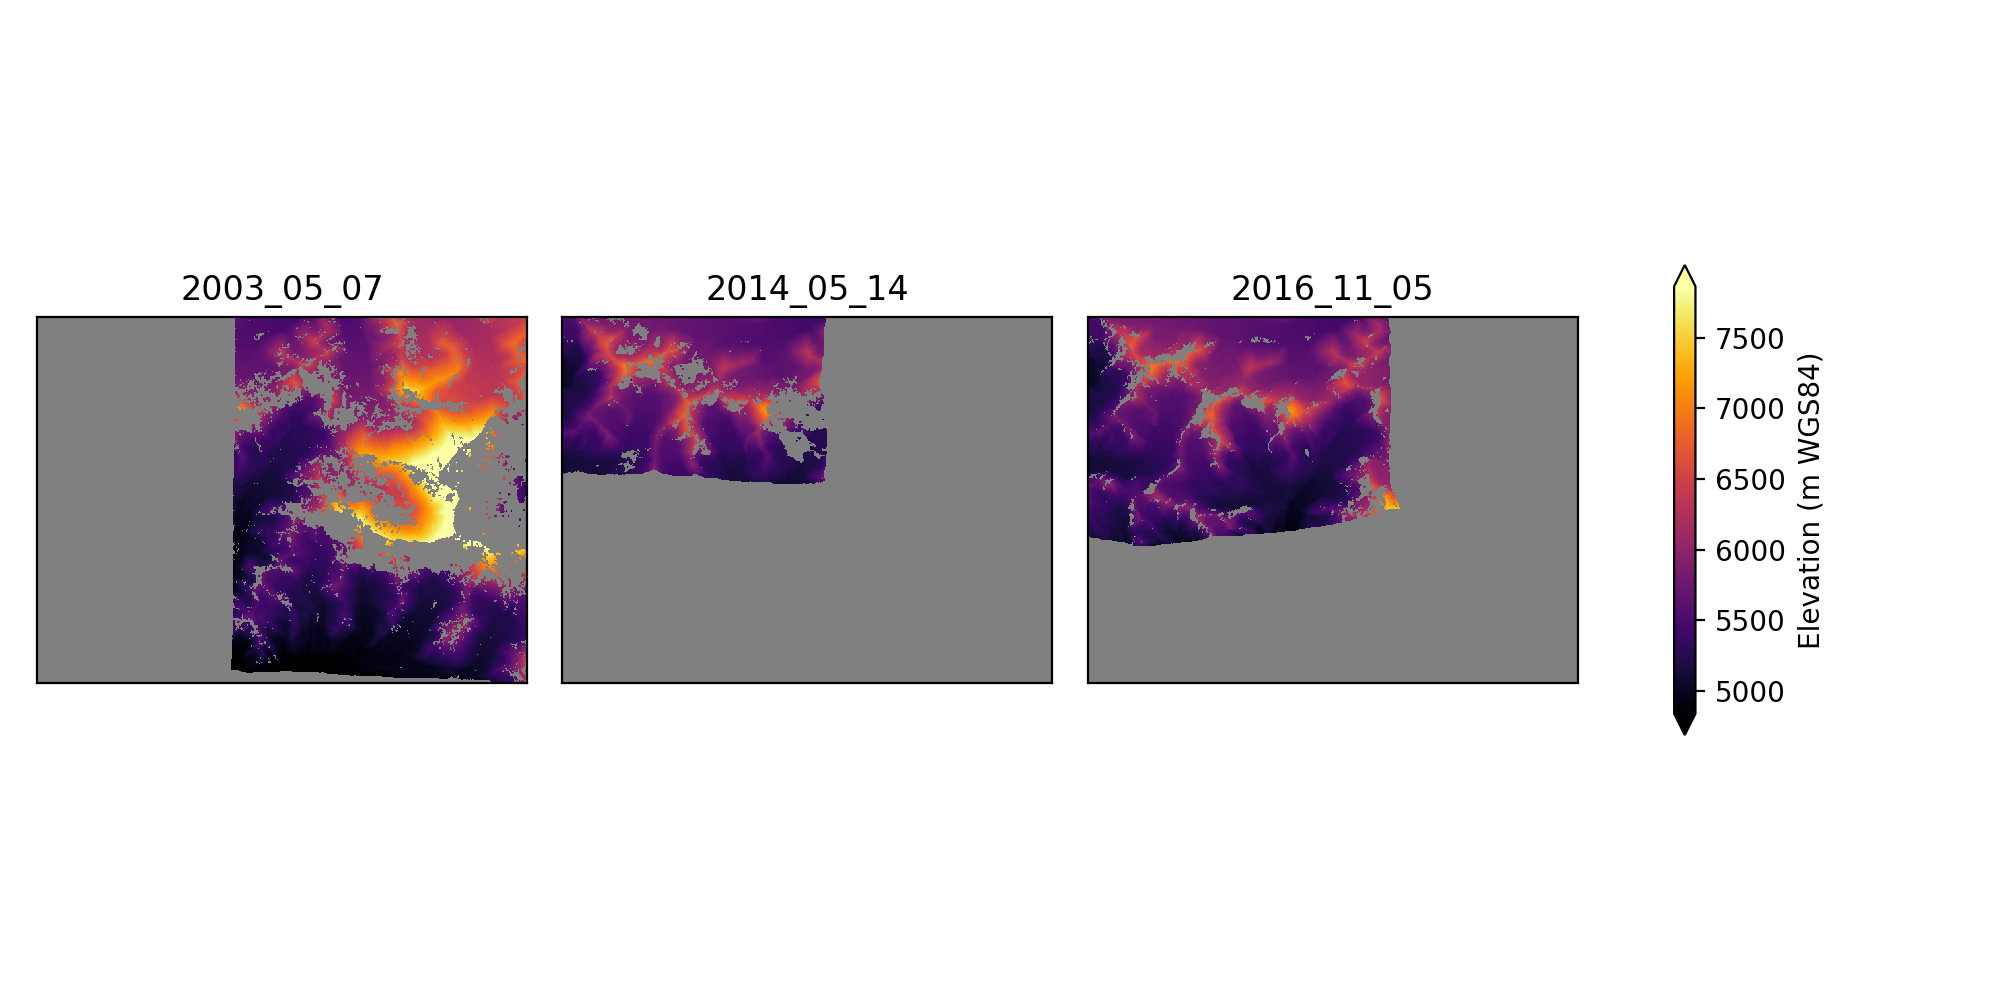

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


In [31]:
# titles = ['2003', '2014', '2016']
all_titles = []

for file in dem_fn_list:
    dateString = file[17:25]
    year = dateString[:4]
    month = dateString[4:6]
    day = dateString[6:8]
    newDate = year + "_" + month + "_" + day
    all_titles.append(newDate)
    
clim = malib.calcperc(dem_list[0], (2,98))

# plot3panel(dem_list[1:27:9], clim, titles, 'inferno', 'Elevation (m WGS84)', fn='dem.png')
dem_3img_list = [dem_list[0], dem_list[10], dem_list[-1]]
titles = [all_titles[0], all_titles[10], all_titles[-1]]
# dem_3img_fn_list = [dem_fn_list[0], dem_fn_list[10], dem_fn_list[-1]]
# print(dem_3img_fn_list)

plot3panel(dem_3img_list, clim, titles, 'inferno', 'Elevation (m WGS84)', fn='dem.png')

In [11]:
# Think about what we want to find and how to calculate that

# Do we want to know the elevation difference between: 
    # each image date, some arbitrary midpoint, and the start and end dates?


20030507_
20140514_
20161105_


<IPython.core.display.Javascript object>


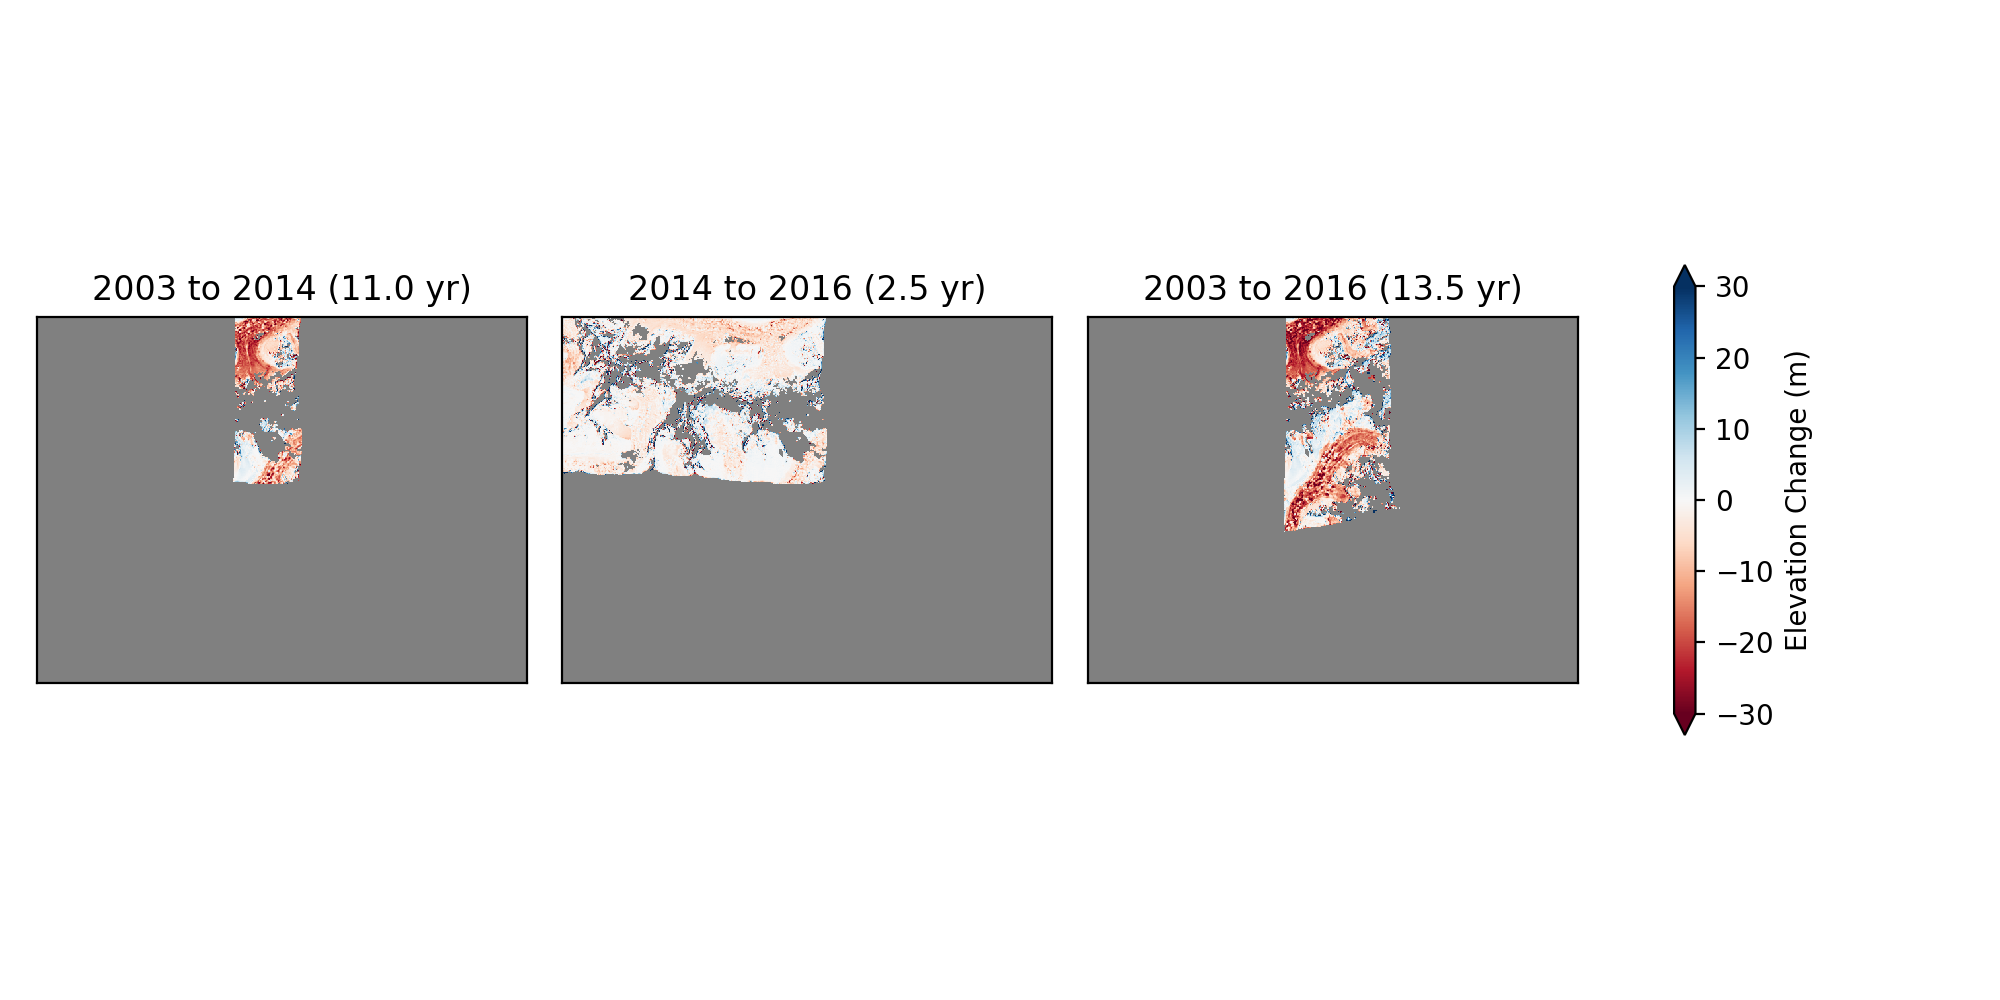

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


In [33]:
#Calculate elevation difference for each time period
#In this case, we will store the difference maps in a list for convenience
dh_list = [dem_list[10] - dem_list[0], dem_list[-1] - dem_list[10], dem_list[-1] - dem_list[0]]
print(dem_fn_list[0][17:26])
print(dem_fn_list[10][17:26])
print(dem_fn_list[-1][17:26])

dem_fn_list_select = [dem_fn_list[0], dem_fn_list[10], dem_fn_list[-1]]
#Let's extract timestamps from filenames
t_list = np.array([timelib.fn_getdatetime(fn) for fn in dem_fn_list_select])
#Now let's compute total time between observations in decimal years
#Compute time differences, convert decimal years
dt_list = [timelib.timedelta2decyear(d) for d in np.diff(t_list)]
#Add the full 1970-2015 time difference
dt_list.append(dt_list[0]+dt_list[1])

#Now plot the elevation differences 
titles = ['2003 to 2014 (%0.1f yr)' % dt_list[0], '2014 to 2016 (%0.1f yr)' % dt_list[1], '2003 to 2016 (%0.1f yr)' % dt_list[2]]
plot3panel(dh_list, (-30, 30), titles, 'RdBu', 'Elevation Change (m)', fn='dem_dh.png')


<IPython.core.display.Javascript object>


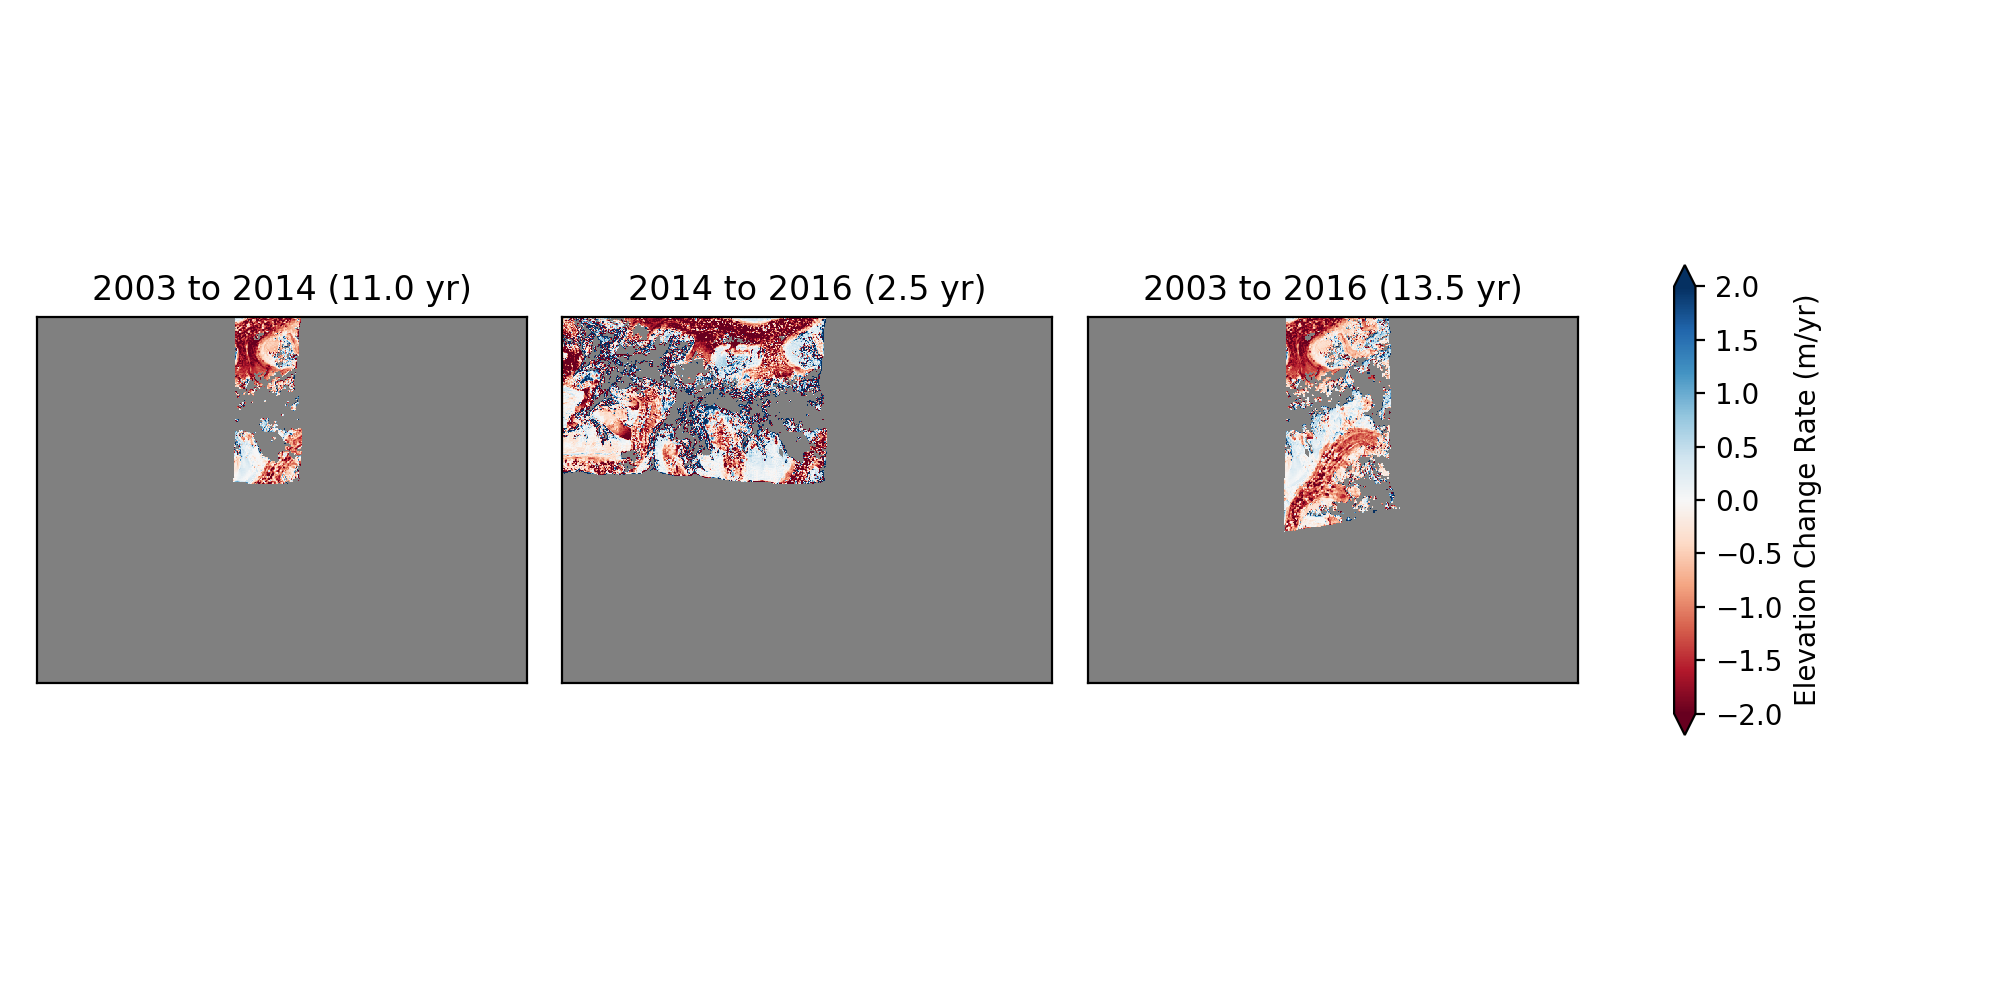

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


In [34]:
#Calculate annual rate of change
dhdt_list = np.ma.array(dh_list)/np.array(dt_list)[:,np.newaxis,np.newaxis]
plot3panel(dhdt_list, (-2, 2), titles, 'RdBu', 'Elevation Change Rate (m/yr)', fn='dem_dhdt.png')

Input shp srs: +proj=longlat +datum=WGS84 +no_defs 
Specified output srs: +proj=utm +zone=45 +datum=WGS84 +units=m +no_defs 


<IPython.core.display.Javascript object>


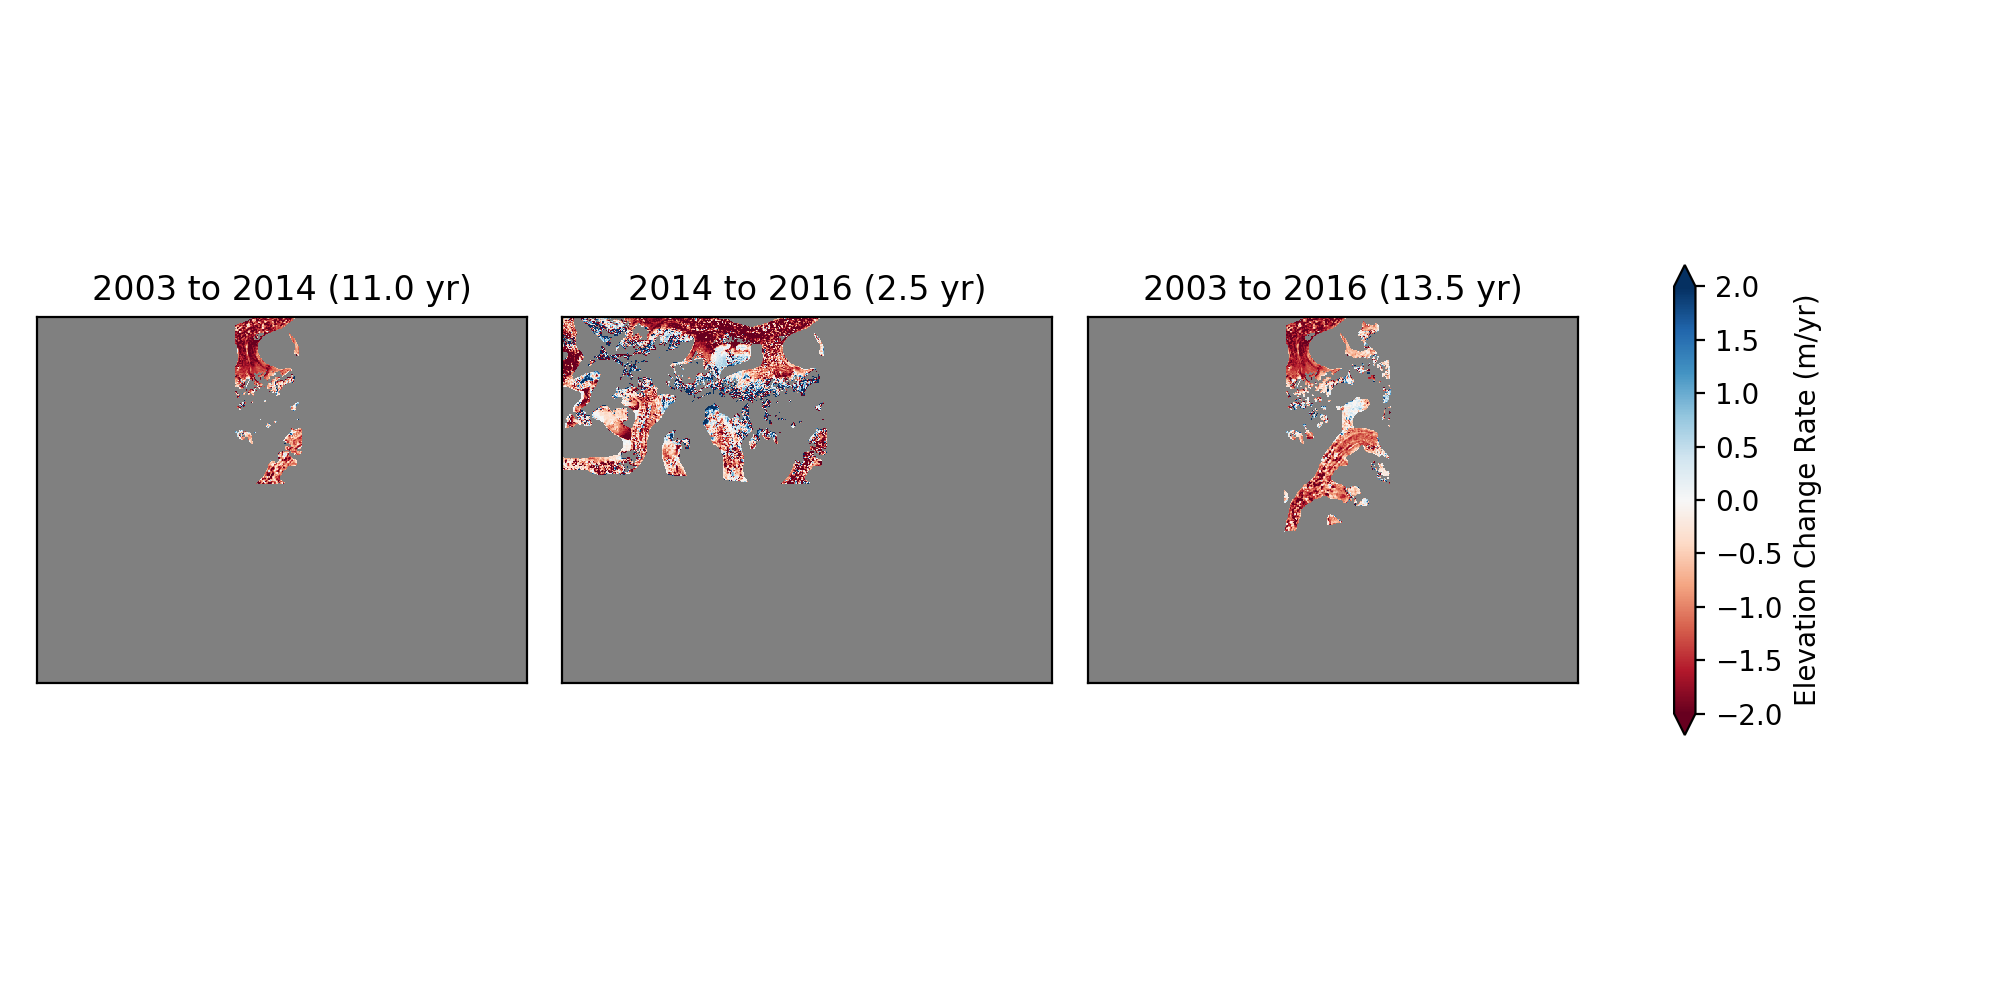

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


In [35]:
shp_fn = '15_rgi60_SouthAsiaEast/15_rgi60_SouthAsiaEast.shp'
#Create binary mask from polygon shapefile to match our warped raster datasets
shp_mask = geolib.shp2array(shp_fn, ds_list[0])
#Now apply the mask to each array 
dhdt_list_shpclip = [np.ma.array(dhdt, mask=shp_mask) for dhdt in dhdt_list]
plot3panel(dhdt_list_shpclip, (-2, 2), titles, 'RdBu', 'Elevation Change Rate (m/yr)', fn='dem_dhdt_shpclip.png')

In [98]:
dem_3img_fn_list
# print(dem_fn_list_hs[0])
# print(dem_fn_list_hs[7])
# print(dem_fn_list_hs[-1])

dem_fn_list[1]

for i in range(0, len(dem_fn_list)):
    if i == 0:
        x = i
    transItem = dem_fn_list[i][17:25]
    hsItem = dem_fn_list_hs[x][13:21]
    if hsItem != transItem:
        print(transItem)
        print(hsItem)
        print(i)
    else:
        x = x+1
            
# print(dem_fn_list[8:12])
# print(dem_fn_list_hs[8:10])

# Missing hs files 9 and 10 

20140324
20141018
9
20140514
20141018
10
['dem_32_transOnly/20140311_0520_103001002E546F00_103001002C956F00-DEM_32m_trans.tif', 'dem_32_transOnly/20140324_0453_102001002D263400_102001002C1E2100-DEM_32m_trans.tif', 'dem_32_transOnly/20140514_0454_102001003001E400_102001002F6B1000-DEM_32m_trans.tif', 'dem_32_transOnly/20141018_0511_1050410011888400_1050410011888300-DEM_32m_trans.tif']
['dem_32_hs_az/20140311_0520_103001002E546F00_103001002C956F00-DEM_32m_trans_hs_az315.tif', 'dem_32_hs_az/20141018_0511_1050410011888400_1050410011888300-DEM_32m_trans_hs_az315.tif']


In [52]:
dem_fn_list[1]

'dem_32_transOnly/20121223_0456_1050410000E0AE00_1050410000E8C900-DEM_32m_trans.tif'

In [105]:
# Calculate the hillshade rasters that are missing from the hs directory

# dem_9_hs_ds = gdal.DEMProcessing('', ds_list[9], 'hillshade', format='MEM')
# dem_9_hs = iolib.ds_getma(dem_9_hs_ds)
# dem_10_hs_ds = gdal.DEMProcessing('', ds_list[10], 'hillshade', format='MEM')
# dem_10_hs = iolib.ds_getma(dem_10_hs_ds)

# hs_list = [dem_hs_list[0:9], dem_9_hs, dem_10_hs_ds, dem_hs_list[10:]]
# # print(len(hs_list)) #this isn't quite right...


#Plot our rates over shaded relief maps
# plot3panel(dhdt_list, (-2, 2), titles, 'RdBu', 'Elevation Change Rate (m/yr)', overlay=hs_list, fn='dem_dhdt_shpclip_hs.png')

NameError: name 'plot' is not defined

In [106]:
#Extract x and y pixel resolution (m) from geotransform
gt = ds_list[0].GetGeoTransform()
px_res = (gt[1], -gt[5])
#Calculate pixel area in m^2
px_area = px_res[0]*px_res[0]
# dhdt_list_shpclip = np.ma.array(dhdt_list_shpclip).reshape(len(dhdt_list_shpclip), dhdt_list_shpclip[0].shape[0]*dhdt_list_shpclip[1].shape[1])

In [107]:
#Now, lets multiple pixel area by the observed elevation change for all valid pixels over glaciers
dhdt_mean = dhdt_list.mean(axis=1)
#Compute area in km^2
area_total = px_area * dhdt_list.count(axis=1) / 1E6
#Volume change rate in km^3/yr
vol_rate = dhdt_mean * area_total / 1E3

print(type(vol_rate))
print(type(area_total))
print(type(dt_list))

# #Volume change in km^3 - issues here.
vol_total = vol_rate * dt_list 
# #Assume intermediate density between ice and snow for volume change (Gt)
# rho = 0.850
# mass_rate = vol_rate * rho
# mass_total = vol_total * rho

# #Print some numbers (clean this up)
# out = zip(titles, dhdt_mean, area_total, vol_rate, vol_total, mass_rate, mass_total)
# for i in out:
#     print(i[0])
#     print('%0.2f m/yr mean elevation change rate' % i[1])
#     print('%0.2f km^2 total area' % i[2])
#     print('%0.2f km^3/yr mean volume change rate' % i[3])
#     print('%0.2f km^3 total volume change' % i[4])
#     print('%0.2f Gt/yr mean mass change rate' % i[5])
#     print('%0.2f Gt total mass change\n' % i[6])

<class 'numpy.ma.core.MaskedArray'>
<class 'numpy.ndarray'>
<class 'list'>


ValueError: operands could not be broadcast together with shapes (3,743) (3,) 